In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

df_encoded = pd.read_csv('airline_passenger_satisfaction_EDA.csv')

print('Total Row : ', len(df))
df_encoded.head(5)

Total Row :  129880


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,...,0,1,1,0,1,0,1,0,0,1
1,2,35,821,26,39.0,2,2,3,5,2,...,1,0,0,1,1,0,1,0,0,0
2,3,41,853,0,0.0,4,4,4,5,4,...,0,1,0,1,1,0,1,0,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,...,0,1,0,1,1,0,1,0,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,...,1,0,0,1,1,0,1,0,0,0


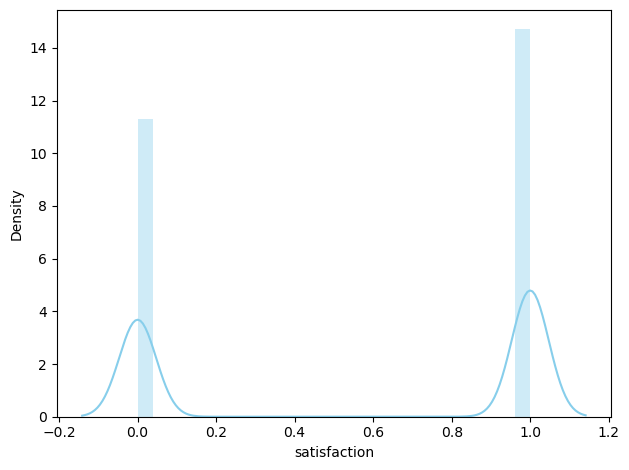

In [8]:
sns.distplot (x=df_encoded ['Satisfaction'], color = 'skyblue')
plt.xlabel("satisfaction")
plt.tight_layout()

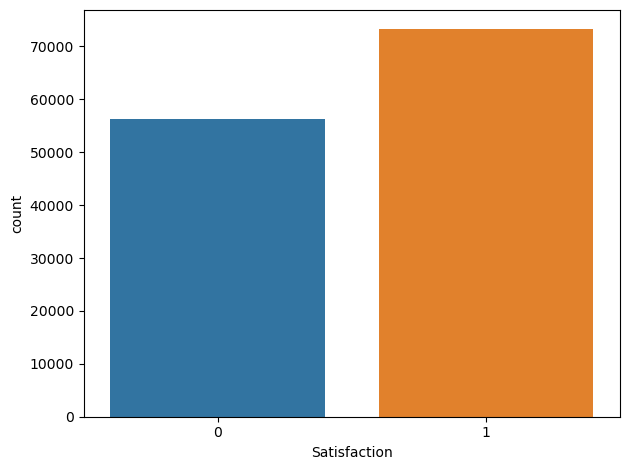

In [10]:
sns.countplot(x=df_encoded["Satisfaction"])
plt.xlabel('Satisfaction')
plt.tight_layout()

<AxesSubplot:>

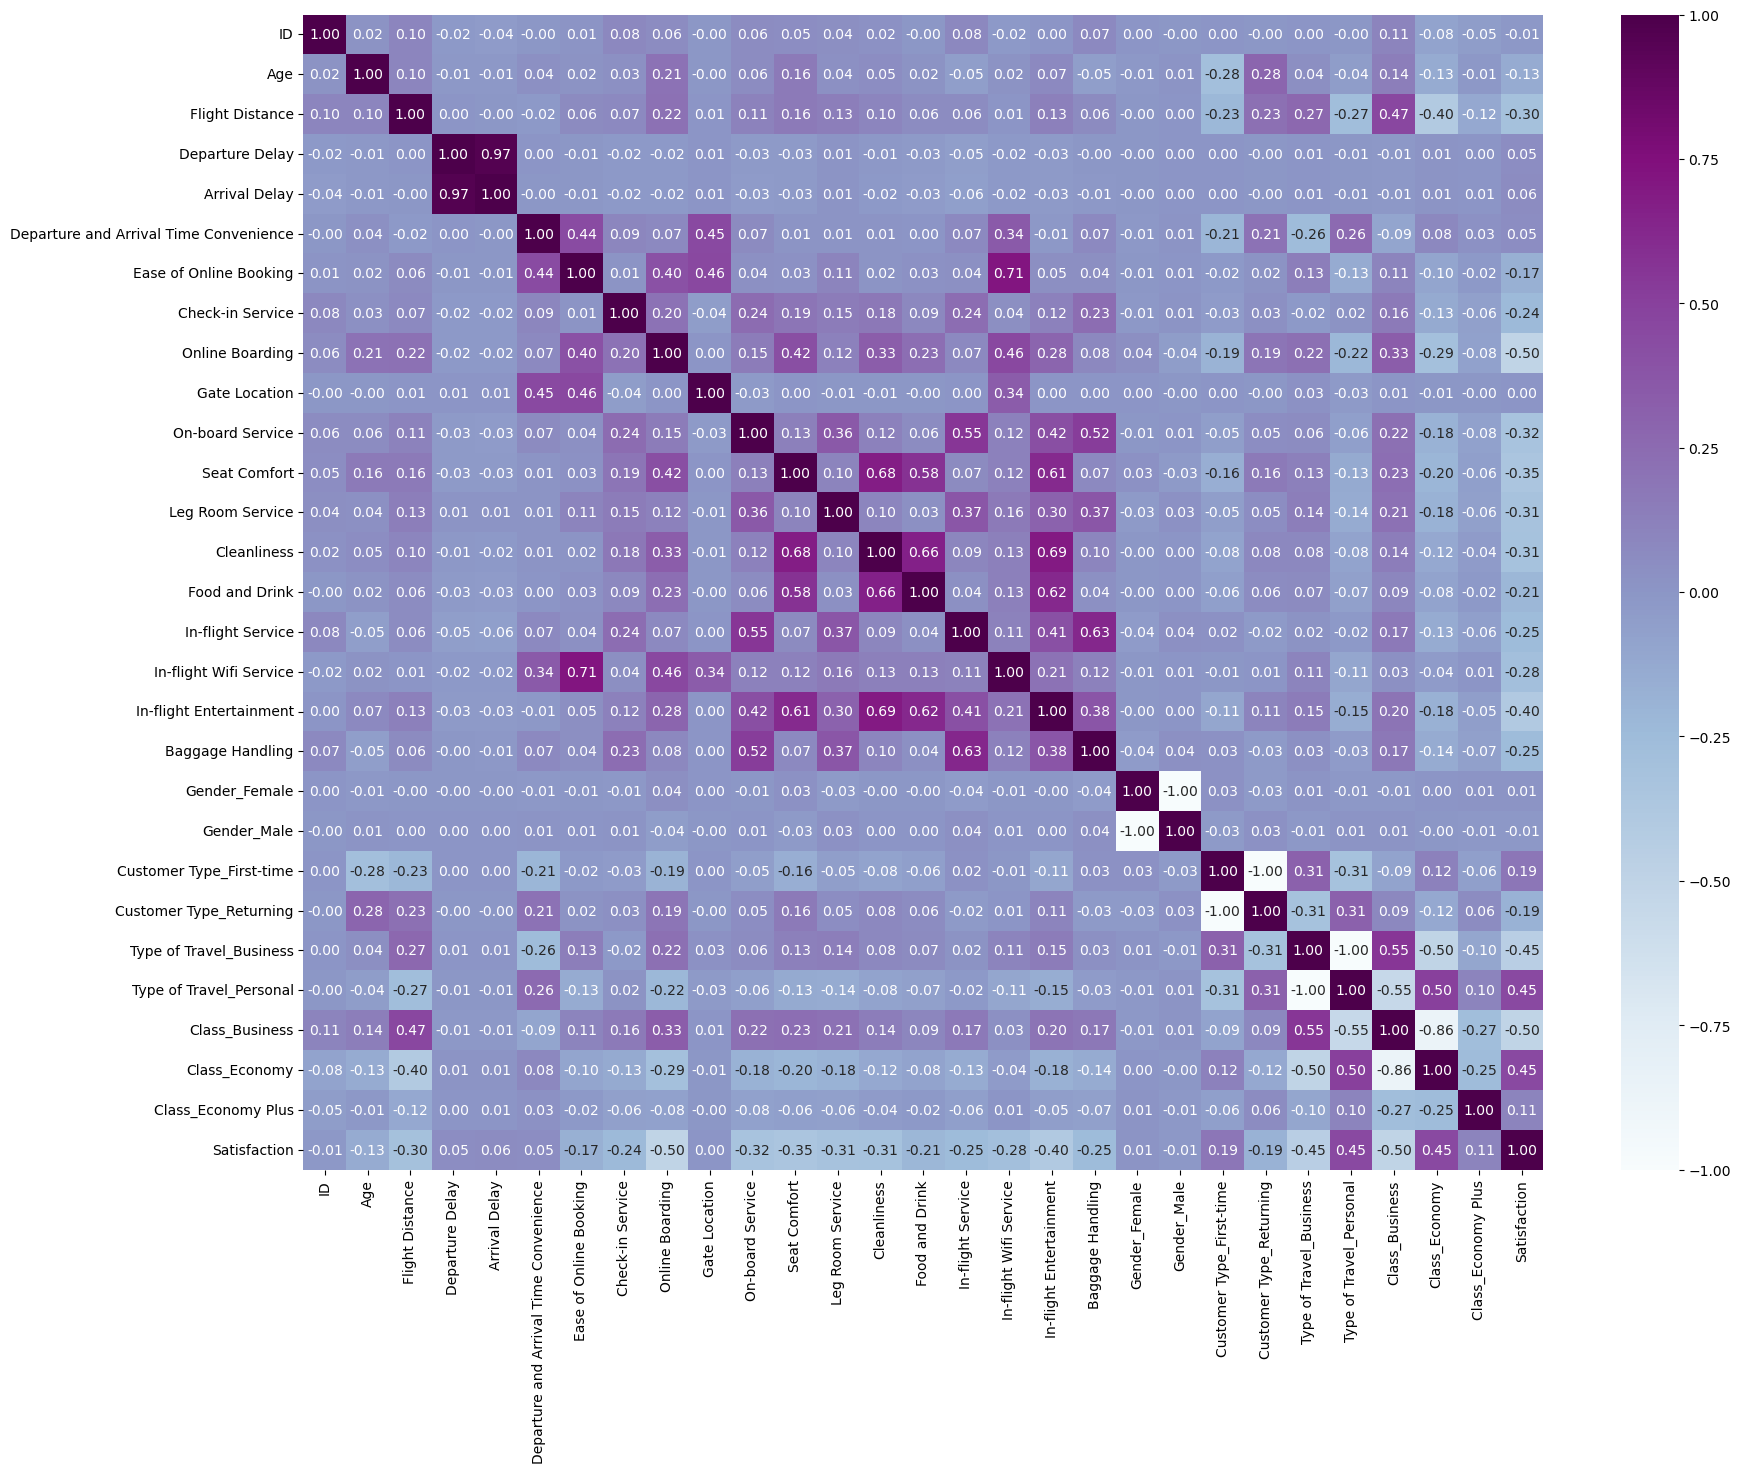

In [13]:
correlation = df_encoded.corr()
plt.figure(figsize = (20,15))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BuPu')

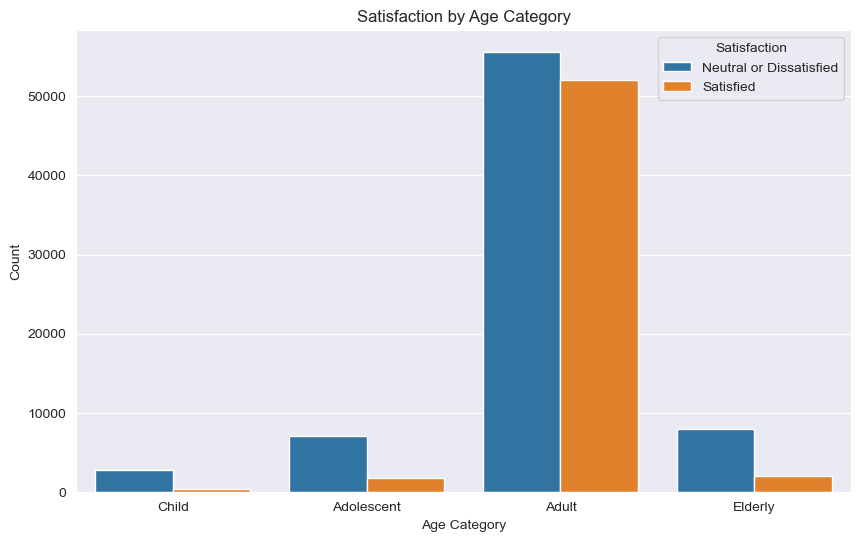

In [14]:
# create a new DataFrame from the 'df' DataFrame
df_age = df[['ID', 'Age', 'Satisfaction']]

# create a function to map ages to categories
def age_category(age):
    if age <= 10:
        return 'Child'
    elif age <= 19:
        return 'Adolescent'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

# create a new column 'Age Category' based on 'Age' column
df_age['Age Category'] = df_age['Age'].apply(age_category)

ageorder = ['Child', 'Adolescent', 'Adult', 'Elderly']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
# create a countplot of the number of satisfied individuals in each age category
sns.countplot(data=df_age, x='Age Category', hue='Satisfaction', order=ageorder)

# add titles and labels
plt.title('Satisfaction by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# show the plot
plt.show()


In [15]:
df_dist = df[["ID","Flight Distance",'Satisfaction']]
df_dist["Distance (km)"] = df_dist ['Flight Distance'] *1.60934

def distance_category(distance):
    if distance < 1000:
        return '1,100-1,500 km'
    elif distance < 4100:
        return '1,500 -4,099 km'
    else:
        return '>4,100 km'
    
df_dist ['Distance Category'] = df_dist["Distance (km)"]. apply (distance_category)

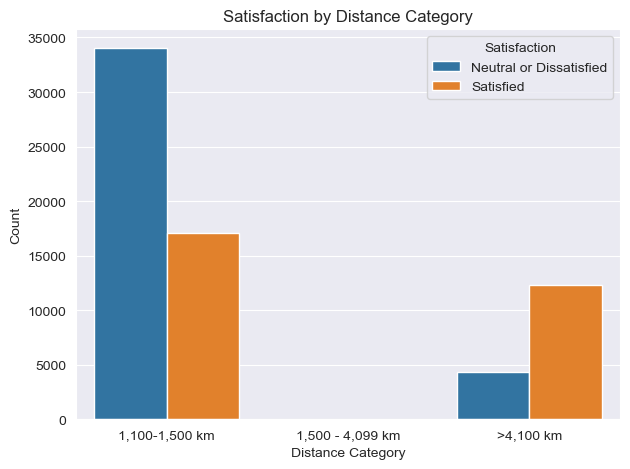

In [17]:
distorder = ['1,100-1,500 km','1,500 - 4,099 km', '>4,100 km']
sns.countplot (data=df_dist, x="Distance Category",hue ="Satisfaction", order =distorder)

plt.title ("Satisfaction by Distance Category")
plt.xlabel('Distance Category')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [18]:
df_deptdelay = df[['ID', 'Departure Delay', 'Satisfaction']]

def dept_delay_category(time):
    if time <= 15:
        return 'Delay <15 mins'
    if time <= 30:
        return 'Delay 15 - 30 mins'
    if time <= 60:
        return 'Delay 30-60 mins'
    else:
        return 'Delay >1 hr'

df_deptdelay['Departure Delay Category'] = df_deptdelay['Departure Delay'].apply(dept_delay_category)

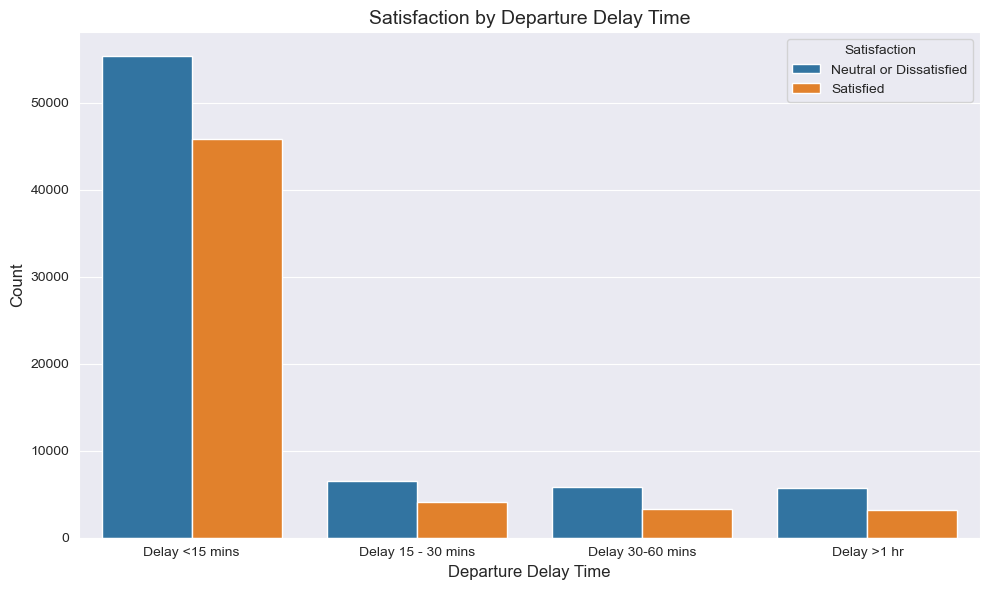

In [19]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_deptdelay, x='Departure Delay Category', hue='Satisfaction', order=deptorder)

plt.title('Satisfaction by Departure Delay Time', fontsize=14)
plt.xlabel('Departure Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()



In [20]:
df_arvdelay = df[['ID', 'Arrival Delay', 'Satisfaction']]
df_arvdelay['Arrival Delay Category'] = df_arvdelay['Arrival Delay'].apply(dept_delay_category)

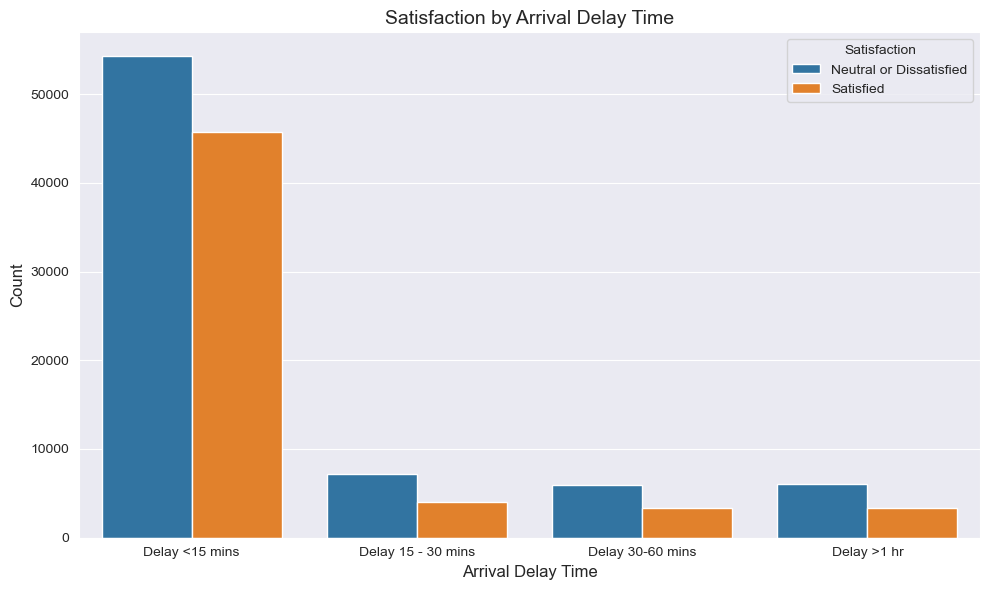

In [21]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arvdelay, x='Arrival Delay Category', hue='Satisfaction', order=deptorder)

plt.title('Satisfaction by Arrival Delay Time', fontsize=14)
plt.xlabel('Arrival Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
data = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',]

len(data)

18

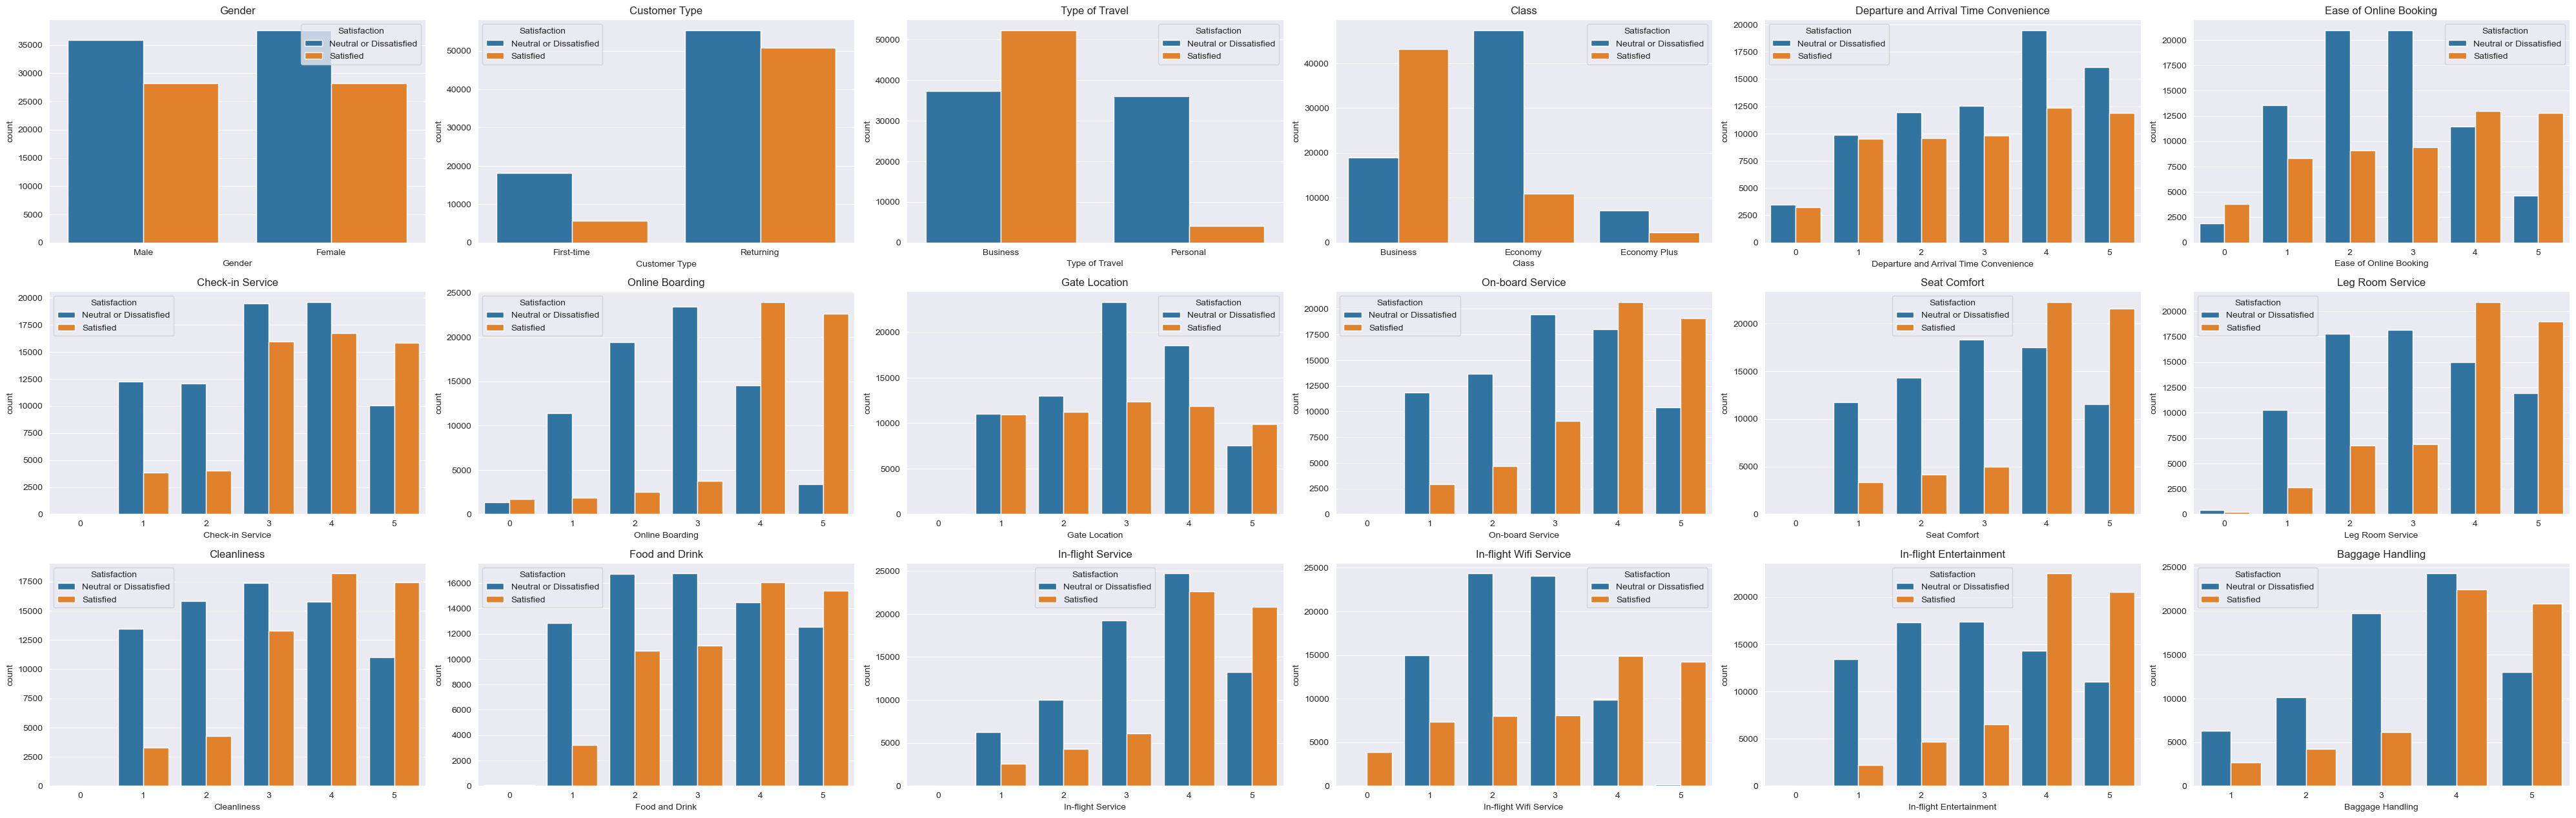

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,25))
for i in range(len(data)):
    plt.subplot(6,6,i+1)
    plt.title(data[i])
    sns.countplot(x=df[data[i]],hue=df['Satisfaction'])
     
plt.tight_layout()

In [24]:
df_encoded.to_csv("airline_passenger_satisfation_model_build.csv",index=False)